In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare
from wrangle import wrangle_telco

In [2]:
df = wrangle_telco()
df.head()

,monthly_charges,total_charges,tenure
customer_id,,,
0013-SMEOE,109.70,7904.25,71
0014-BMAQU,84.65,5377.80,63
0016-QLJIS,90.45,5957.90,65
0017-DINOC,45.20,2460.55,54
0017-IUDMW,116.80,8456.75,72


In [3]:
train, validate, test = prepare.split(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head()

train -> (949, 3)
validate -> (407, 3)
test -> (339, 3)


,monthly_charges,total_charges,tenure
customer_id,,,
7501-IWUNG,73.80,4616.05,61
1303-SRDOK,69.05,3842.60,55
3967-VQOGC,24.90,1680.25,67
3777-XROBG,19.55,1079.65,58
5075-JSDKI,24.45,1493.10,59


### 1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
def plot_variable_pairs(df):
    sns.pairplot(df, 
                 kind = "reg", 
                 plot_kws = {'line_kws': {'color': 'red'}}) 

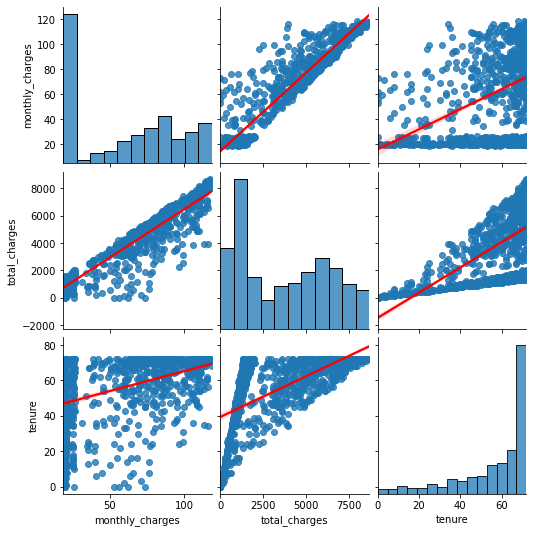

In [5]:
plot_variable_pairs(train)

In [6]:
def plot_variable_pairs(df):
    g = sns.PairGrid(df)
#can specify any two functions for visualization
    g.map_diag(sns.distplot) # single variable
    g.map_offdiag(sns.regplot,  
                  line_kws={"color": "red"}) # interaction of two variables

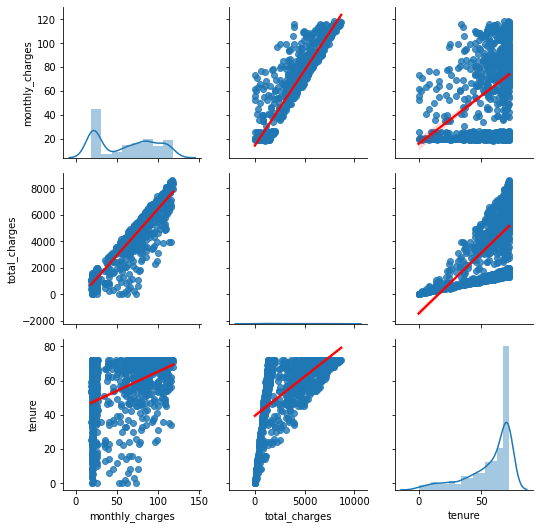

In [7]:
plot_variable_pairs(train)

### 2. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
def months_to_years(df):
    df['tenure_years'] = (df.tenure//12)
    return df

In [9]:
months_to_years(train).head()

,monthly_charges,total_charges,tenure,tenure_years
customer_id,,,,
7501-IWUNG,73.80,4616.05,61,5
1303-SRDOK,69.05,3842.60,55,4
3967-VQOGC,24.90,1680.25,67,5
3777-XROBG,19.55,1079.65,58,4
5075-JSDKI,24.45,1493.10,59,4


### 3. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [10]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

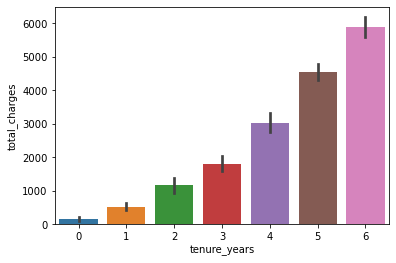

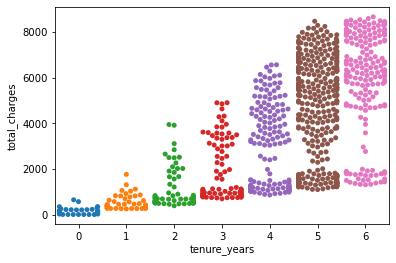

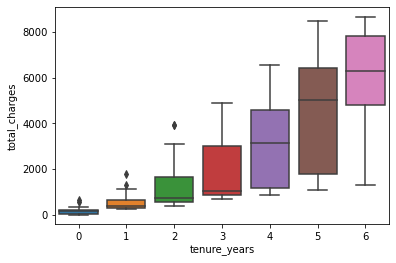

In [11]:
#continuous var = total_charges
plot_categorical_and_continuous_vars(train,'tenure_years','total_charges')

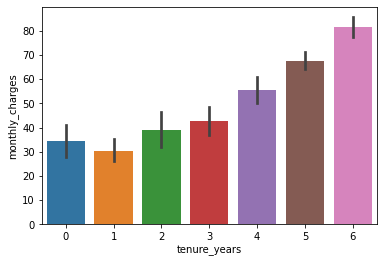

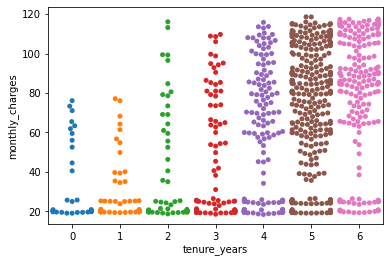

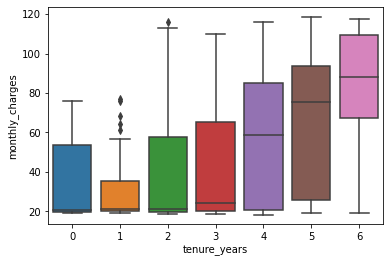

In [12]:
#continuous var = monthly_charges
plot_categorical_and_continuous_vars(train,'tenure_years','monthly_charges')

### 4. Save the functions you have written to create visualizations in a file named `explore.py`. Rewrite your notebook code so that you are using the functions imported from this file.

In [17]:
from wrangle import wrangle_telco
import explore

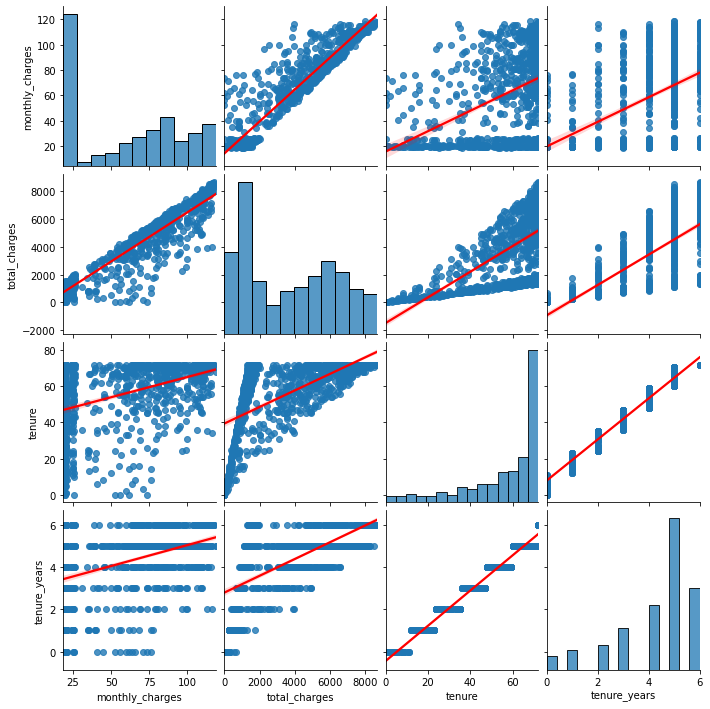

In [18]:
explore.plot_variable_pairs(train)

In [19]:
explore.months_to_years(train).head()

,monthly_charges,total_charges,tenure,tenure_years
customer_id,,,,
7501-IWUNG,73.80,4616.05,61,5
1303-SRDOK,69.05,3842.60,55,4
3967-VQOGC,24.90,1680.25,67,5
3777-XROBG,19.55,1079.65,58,4
5075-JSDKI,24.45,1493.10,59,4


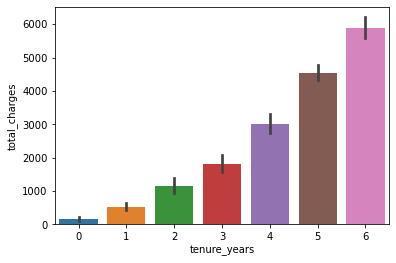

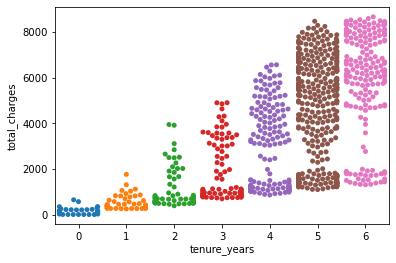

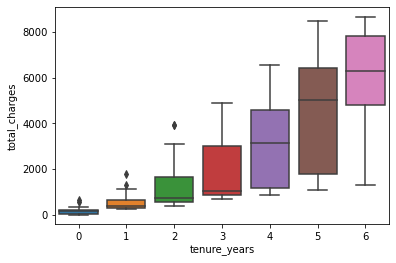

In [20]:
explore.plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

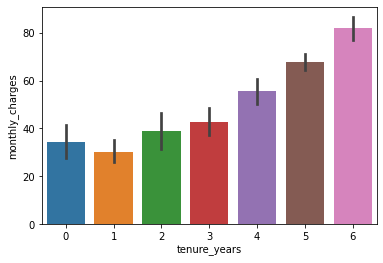

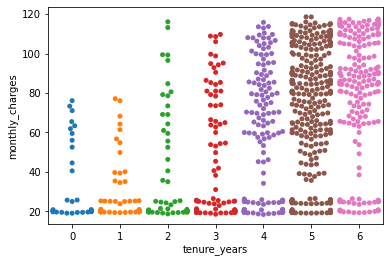

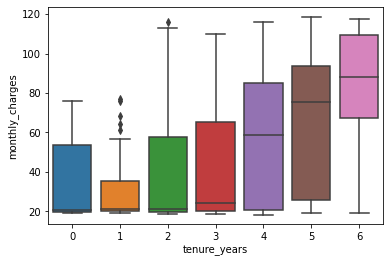

In [21]:
explore.plot_categorical_and_continuous_vars(train, 'tenure_years', 'monthly_charges')

### 5. Explore your dataset with any other visualizations you think will be helpful.

(0.0, 4.0)

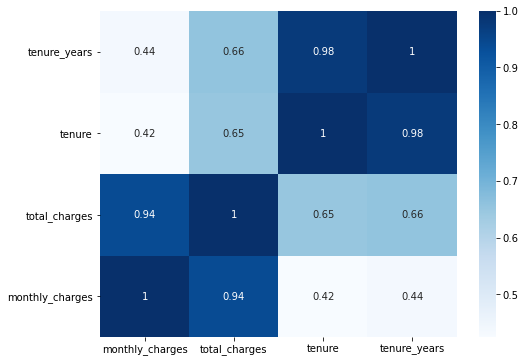

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.ylim(0, 4)

<AxesSubplot:xlabel='tenure_years', ylabel='monthly_charges'>

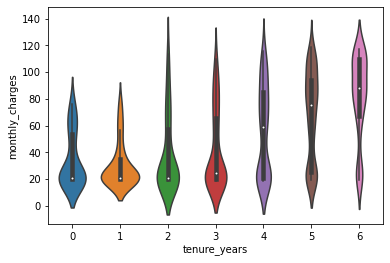

In [27]:
sns.violinplot(data = train, x='tenure_years', y='monthly_charges')

### 6. In a separate notebook, use the functions you have developed in this exercise with the zillow customers dataset.

In [ ]:
#in explore_zillow